In [3]:
from bs4 import BeautifulSoup
import urllib
import pandas as pd
import numpy
import os
import sys

In [2]:
web_page_url = "https://www.forbes.com/sites/insideasia/2017/12/10/why-blockchain-is-real-and-bitcoin-is-a-mirage/#22b198984215"

In [4]:
page = urllib.request.urlopen(web_page_url)

In [5]:
page

In [8]:
soup = BeautifulSoup(page)
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <base href="/"/>
  <title>
   Why Blockchain Is Real And Bitcoin Is A Mirage
  </title>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <link href="https://www.forbes.com/sites/insideasia/2017/12/10/why-blockchain-is-real-and-bitcoin-is-a-mirage/" itemprop="url" rel="canonical"/>
  <script>
   !function(e){function n(r){if(t[r])return t[r].exports;var o=t[r]={i:r,l:!1,exports:{}};return e[r].call(o.exports,o,o.exports,n),o.l=!0,o.exports}var r=window.webpackJsonp;window.webpackJsonp=function(t,a,c){for(var i,u,f,s=0,l=[];s<t.length;s++)u=t[s],o[u]&&l.push(o[u][0]),o[u]=0;for(i in a)Object.prototype.hasOwnProperty.call(a,i)&&(e[i]=a[i]);for(r&&r(t,a,c);l.length;)l.shift()();if(c)for(s=0;s<c.length;s++)f=n(n.s=c[s]);return f};var t={},o={6:0};n.e=function(e){function r(){i.onerror=i.onload=null,clearTimeout(u);var n=o[e];0!==n&&(n

E:\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file E:\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [9]:
paras = soup.find_all('p')

In [10]:
type(paras)

bs4.element.ResultSet

In [19]:
len(paras)

31

In [23]:
for element in paras:
    print(type(element))
    print(element.name)
    print(element.attrs)
    print(element.string)

<class 'bs4.element.Tag'>
p
{'_ngcontent-c18': '', 'class': ['intro', 'fs-text-xxs']}
Guest post written by
<class 'bs4.element.Tag'>
p
{'_ngcontent-c18': '', 'class': ['name', 'fs-text-m']}
James Cheo
<class 'bs4.element.Tag'>
p
{'_ngcontent-c18': '', 'class': ['bio', 'fs-text-xs', 'fs-responsive-text'], 'innerhtml': 'James Cheo is an Investment Strategist at Bank of Singapore.'}
James Cheo is an Investment Strategist at Bank of Singapore.
<class 'bs4.element.Tag'>
p
{'class': ['speakable-paragraph']}
In less than a decade, bitcoin has gone from being an obscure curiosity to a household name. Its value has risen -- with ups and downs -- from almost nothing to $16,000 at the time of writing.
<class 'bs4.element.Tag'>
p
{}
Bitcoin’s rise is spectacular. Its price is up almost thirtyfold in the past two years. Currently, the value of Bitcoin in circulation is more than US$170 billion, greater than the market capitalization of McDonald’s. This is remarkable because unlike McDonald’s, whic

In [127]:
paras[3].string

'In less than a decade, bitcoin has gone from being an obscure curiosity to a household name. Its value has risen -- with ups and downs -- from almost nothing to $16,000 at the time of writing.'

In [120]:
paras2 = soup.find_all("p",class_ = {})  ### class_ not class

In [121]:
len(paras2)

25

In [122]:
for element in paras2:
    print(type(element))
    print(element.name)
    print(element.attrs)
    print(element.string)

<class 'bs4.element.Tag'>
p
{}
Bitcoin’s rise is spectacular. Its price is up almost thirtyfold in the past two years. Currently, the value of Bitcoin in circulation is more than US$170 billion, greater than the market capitalization of McDonald’s. This is remarkable because unlike McDonald’s, which has stores in almost every corner of the world, Bitcoin as a virtual currency is hardly even transacted in the real world.
<class 'bs4.element.Tag'>
p
{}
Bitcoin is a mirage
<class 'bs4.element.Tag'>
p
{}
The rise in Bitcoin’s value reflects speculation about its future value: This digital currency will have long-term value as long as it is accepted as a medium of exchange and a store of value.
<class 'bs4.element.Tag'>
p
{}
None
<class 'bs4.element.Tag'>
p
{}


<class 'bs4.element.Tag'>
p
{}
By design, there are inherent weaknesses that prevent Bitcoin from becoming real money.
<class 'bs4.element.Tag'>
p
{}
For it to be real money, Bitcoin must be a viable and stable store of value. It is

In [133]:
sentences = [element.string for element in paras2 if element.string not in [None,'\n']]
sentences

['Bitcoin’s rise is spectacular. Its price is up almost thirtyfold in the past two years. Currently, the value of Bitcoin in circulation is more than US$170 billion, greater than the market capitalization of McDonald’s. This is remarkable because unlike McDonald’s, which has stores in almost every corner of the world, Bitcoin as a virtual currency is hardly even transacted in the real world.',
 'Bitcoin is a mirage',
 'The rise in Bitcoin’s value reflects speculation about its future value: This digital currency will have long-term value as long as it is accepted as a medium of exchange and a store of value.',
 'By design, there are inherent weaknesses that prevent Bitcoin from becoming real money.',
 'For it to be real money, Bitcoin must be a viable and stable store of value. It is a poor store of value because of its extreme volatility. Bitcoin’s price is characterized by wild swings, both up and down, with the potential to move more than 20% in a single day. This volatility is almo

In [134]:
del(sentences[1])

In [162]:
singlepara = ' '.join(sentences)

In [163]:
singlepara

'Bitcoin’s rise is spectacular. Its price is up almost thirtyfold in the past two years. Currently, the value of Bitcoin in circulation is more than US$170 billion, greater than the market capitalization of McDonald’s. This is remarkable because unlike McDonald’s, which has stores in almost every corner of the world, Bitcoin as a virtual currency is hardly even transacted in the real world. The rise in Bitcoin’s value reflects speculation about its future value: This digital currency will have long-term value as long as it is accepted as a medium of exchange and a store of value. By design, there are inherent weaknesses that prevent Bitcoin from becoming real money. For it to be real money, Bitcoin must be a viable and stable store of value. It is a poor store of value because of its extreme volatility. Bitcoin’s price is characterized by wild swings, both up and down, with the potential to move more than 20% in a single day. This volatility is almost by construction because Bitcoin’s 

In [310]:
import nltk

In [313]:
#nltk.Text(sentences)

<Text: Bitcoins rise is spectacular. Its price is up almost thirtyfold in the past two years. Currently, the value of Bitcoin in circulation is more than US$170 billion, greater than the market capitalization of McDonalds. This is remarkable because unlike McDonalds, which has stores in almost every corner of the world, Bitcoin as a virtual currency is hardly even transacted in the real world. The rise in Bitcoins value reflects speculation about its future value: This digital currency will have long-term value as long as it is accepted as a medium of exchange and a store of value. By design, there are inherent weaknesses that prevent Bitcoin from becoming real money. For it to be real money, Bitcoin must be a viable and stable store of value. It is a poor store of value because of its extreme volatility....>

In [314]:
#type(nltk.Text(sentences))

nltk.text.Text

In [161]:
#singlepara.encode("ascii","replace")  ## no ascii encoding for quotes

b'Bitcoin?s rise is spectacular. Its price is up almost thirtyfold in the past two years. Currently, the value of Bitcoin in circulation is more than US$170 billion, greater than the market capitalization of McDonald?s. This is remarkable because unlike McDonald?s, which has stores in almost every corner of the world, Bitcoin as a virtual currency is hardly even transacted in the real world. The rise in Bitcoin?s value reflects speculation about its future value: This digital currency will have long-term value as long as it is accepted as a medium of exchange and a store of value. By design, there are inherent weaknesses that prevent Bitcoin from becoming real money. For it to be real money, Bitcoin must be a viable and stable store of value. It is a poor store of value because of its extreme volatility. Bitcoin?s price is characterized by wild swings, both up and down, with the potential to move more than 20% in a single day. This volatility is almost by construction because Bitcoin?s

In [208]:
finaltext = singlepara.encode("ascii","ignore")

In [209]:
finaltext

b'Bitcoins rise is spectacular. Its price is up almost thirtyfold in the past two years. Currently, the value of Bitcoin in circulation is more than US$170 billion, greater than the market capitalization of McDonalds. This is remarkable because unlike McDonalds, which has stores in almost every corner of the world, Bitcoin as a virtual currency is hardly even transacted in the real world. The rise in Bitcoins value reflects speculation about its future value: This digital currency will have long-term value as long as it is accepted as a medium of exchange and a store of value. By design, there are inherent weaknesses that prevent Bitcoin from becoming real money. For it to be real money, Bitcoin must be a viable and stable store of value. It is a poor store of value because of its extreme volatility. Bitcoins price is characterized by wild swings, both up and down, with the potential to move more than 20% in a single day. This volatility is almost by construction because Bitcoins suppl

In [210]:
finaltext = finaltext.decode("utf-8")  ## Converting Bytes to string
finaltext

'Bitcoins rise is spectacular. Its price is up almost thirtyfold in the past two years. Currently, the value of Bitcoin in circulation is more than US$170 billion, greater than the market capitalization of McDonalds. This is remarkable because unlike McDonalds, which has stores in almost every corner of the world, Bitcoin as a virtual currency is hardly even transacted in the real world. The rise in Bitcoins value reflects speculation about its future value: This digital currency will have long-term value as long as it is accepted as a medium of exchange and a store of value. By design, there are inherent weaknesses that prevent Bitcoin from becoming real money. For it to be real money, Bitcoin must be a viable and stable store of value. It is a poor store of value because of its extreme volatility. Bitcoins price is characterized by wild swings, both up and down, with the potential to move more than 20% in a single day. This volatility is almost by construction because Bitcoins supply

In [168]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from string import punctuation

In [186]:
stopwords.words("english")   ## Returns list of stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [211]:
sentences = sent_tokenize(finaltext)
sentences

['Bitcoins rise is spectacular.',
 'Its price is up almost thirtyfold in the past two years.',
 'Currently, the value of Bitcoin in circulation is more than US$170 billion, greater than the market capitalization of McDonalds.',
 'This is remarkable because unlike McDonalds, which has stores in almost every corner of the world, Bitcoin as a virtual currency is hardly even transacted in the real world.',
 'The rise in Bitcoins value reflects speculation about its future value: This digital currency will have long-term value as long as it is accepted as a medium of exchange and a store of value.',
 'By design, there are inherent weaknesses that prevent Bitcoin from becoming real money.',
 'For it to be real money, Bitcoin must be a viable and stable store of value.',
 'It is a poor store of value because of its extreme volatility.',
 'Bitcoins price is characterized by wild swings, both up and down, with the potential to move more than 20% in a single day.',
 'This volatility is almost by

In [212]:
words = word_tokenize(finaltext.lower())
words

['bitcoins',
 'rise',
 'is',
 'spectacular',
 '.',
 'its',
 'price',
 'is',
 'up',
 'almost',
 'thirtyfold',
 'in',
 'the',
 'past',
 'two',
 'years',
 '.',
 'currently',
 ',',
 'the',
 'value',
 'of',
 'bitcoin',
 'in',
 'circulation',
 'is',
 'more',
 'than',
 'us',
 '$',
 '170',
 'billion',
 ',',
 'greater',
 'than',
 'the',
 'market',
 'capitalization',
 'of',
 'mcdonalds',
 '.',
 'this',
 'is',
 'remarkable',
 'because',
 'unlike',
 'mcdonalds',
 ',',
 'which',
 'has',
 'stores',
 'in',
 'almost',
 'every',
 'corner',
 'of',
 'the',
 'world',
 ',',
 'bitcoin',
 'as',
 'a',
 'virtual',
 'currency',
 'is',
 'hardly',
 'even',
 'transacted',
 'in',
 'the',
 'real',
 'world',
 '.',
 'the',
 'rise',
 'in',
 'bitcoins',
 'value',
 'reflects',
 'speculation',
 'about',
 'its',
 'future',
 'value',
 ':',
 'this',
 'digital',
 'currency',
 'will',
 'have',
 'long-term',
 'value',
 'as',
 'long',
 'as',
 'it',
 'is',
 'accepted',
 'as',
 'a',
 'medium',
 'of',
 'exchange',
 'and',
 'a',
 's

In [213]:
len(words)

802

In [214]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [193]:
stop_words = stopwords.words("english") + list(punctuation)   ## Preparing a list of stopwords and punctuations to remove them
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [215]:
words_without_stop_punct = [word for word in words if word not in stop_words]      
words_without_stop_punct

['bitcoins',
 'rise',
 'spectacular',
 'price',
 'almost',
 'thirtyfold',
 'past',
 'two',
 'years',
 'currently',
 'value',
 'bitcoin',
 'circulation',
 'us',
 '170',
 'billion',
 'greater',
 'market',
 'capitalization',
 'mcdonalds',
 'remarkable',
 'unlike',
 'mcdonalds',
 'stores',
 'almost',
 'every',
 'corner',
 'world',
 'bitcoin',
 'virtual',
 'currency',
 'hardly',
 'even',
 'transacted',
 'real',
 'world',
 'rise',
 'bitcoins',
 'value',
 'reflects',
 'speculation',
 'future',
 'value',
 'digital',
 'currency',
 'long-term',
 'value',
 'long',
 'accepted',
 'medium',
 'exchange',
 'store',
 'value',
 'design',
 'inherent',
 'weaknesses',
 'prevent',
 'bitcoin',
 'becoming',
 'real',
 'money',
 'real',
 'money',
 'bitcoin',
 'must',
 'viable',
 'stable',
 'store',
 'value',
 'poor',
 'store',
 'value',
 'extreme',
 'volatility',
 'bitcoins',
 'price',
 'characterized',
 'wild',
 'swings',
 'potential',
 'move',
 '20',
 'single',
 'day',
 'volatility',
 'almost',
 'construction

In [217]:
len(words_without_stop_punct)

401

In [197]:
from nltk.stem import WordNetLemmatizer

In [219]:
words_lemmatized = [WordNetLemmatizer().lemmatize(word) for word in words_without_stop_punct  ]
words_lemmatized

['bitcoins',
 'rise',
 'spectacular',
 'price',
 'almost',
 'thirtyfold',
 'past',
 'two',
 'year',
 'currently',
 'value',
 'bitcoin',
 'circulation',
 'u',
 '170',
 'billion',
 'greater',
 'market',
 'capitalization',
 'mcdonalds',
 'remarkable',
 'unlike',
 'mcdonalds',
 'store',
 'almost',
 'every',
 'corner',
 'world',
 'bitcoin',
 'virtual',
 'currency',
 'hardly',
 'even',
 'transacted',
 'real',
 'world',
 'rise',
 'bitcoins',
 'value',
 'reflects',
 'speculation',
 'future',
 'value',
 'digital',
 'currency',
 'long-term',
 'value',
 'long',
 'accepted',
 'medium',
 'exchange',
 'store',
 'value',
 'design',
 'inherent',
 'weakness',
 'prevent',
 'bitcoin',
 'becoming',
 'real',
 'money',
 'real',
 'money',
 'bitcoin',
 'must',
 'viable',
 'stable',
 'store',
 'value',
 'poor',
 'store',
 'value',
 'extreme',
 'volatility',
 'bitcoins',
 'price',
 'characterized',
 'wild',
 'swing',
 'potential',
 'move',
 '20',
 'single',
 'day',
 'volatility',
 'almost',
 'construction',
 'b

In [230]:
WordNetLemmatizer().lemmatize("transaction","v") #### Lemmatizer almost giving same words, lets try stemming

'transaction'

In [231]:
from nltk.stem.snowball import EnglishStemmer

In [235]:
EnglishStemmer().stem("transaction")

'transact'

In [246]:
words_stemmed = [EnglishStemmer().stem(word) for word in words_without_stop_punct  ]
words_stemmed  ## Gives much better results compared to lemmatizing

['bitcoin',
 'rise',
 'spectacular',
 'price',
 'almost',
 'thirtyfold',
 'past',
 'two',
 'year',
 'current',
 'valu',
 'bitcoin',
 'circul',
 'us',
 '170',
 'billion',
 'greater',
 'market',
 'capit',
 'mcdonald',
 'remark',
 'unlik',
 'mcdonald',
 'store',
 'almost',
 'everi',
 'corner',
 'world',
 'bitcoin',
 'virtual',
 'currenc',
 'hard',
 'even',
 'transact',
 'real',
 'world',
 'rise',
 'bitcoin',
 'valu',
 'reflect',
 'specul',
 'futur',
 'valu',
 'digit',
 'currenc',
 'long-term',
 'valu',
 'long',
 'accept',
 'medium',
 'exchang',
 'store',
 'valu',
 'design',
 'inher',
 'weak',
 'prevent',
 'bitcoin',
 'becom',
 'real',
 'money',
 'real',
 'money',
 'bitcoin',
 'must',
 'viabl',
 'stabl',
 'store',
 'valu',
 'poor',
 'store',
 'valu',
 'extrem',
 'volatil',
 'bitcoin',
 'price',
 'character',
 'wild',
 'swing',
 'potenti',
 'move',
 '20',
 'singl',
 'day',
 'volatil',
 'almost',
 'construct',
 'bitcoin',
 'suppli',
 'relat',
 'fix',
 'demand',
 'chang',
 'dramat',
 'suppli'

In [247]:
from nltk.probability import FreqDist

In [281]:
freq = FreqDist(words_stemmed)     ## Frequency of the words
freq.most_common(10)

[('bitcoin', 21),
 ('blockchain', 13),
 ('transact', 9),
 ('valu', 7),
 ('cryptocurr', 7),
 ('store', 4),
 ('real', 4),
 ('futur', 4),
 ('money', 4),
 ('suppli', 4)]

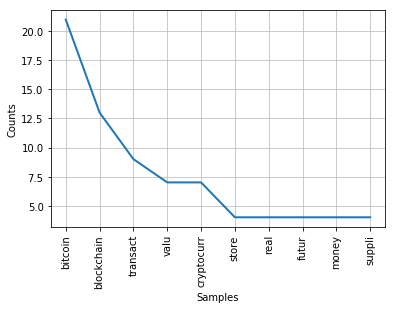

In [308]:
freq.plot(10)

In [254]:
from collections import defaultdict

In [279]:
ranking = defaultdict(int)
ranking

defaultdict(int, {})

In [264]:
list(enumerate(sentences))

[(0, 'Bitcoins rise is spectacular.'),
 (1, 'Its price is up almost thirtyfold in the past two years.'),
 (2,
  'Currently, the value of Bitcoin in circulation is more than US$170 billion, greater than the market capitalization of McDonalds.'),
 (3,
  'This is remarkable because unlike McDonalds, which has stores in almost every corner of the world, Bitcoin as a virtual currency is hardly even transacted in the real world.'),
 (4,
  'The rise in Bitcoins value reflects speculation about its future value: This digital currency will have long-term value as long as it is accepted as a medium of exchange and a store of value.'),
 (5,
  'By design, there are inherent weaknesses that prevent Bitcoin from becoming real money.'),
 (6,
  'For it to be real money, Bitcoin must be a viable and stable store of value.'),
 (7, 'It is a poor store of value because of its extreme volatility.'),
 (8,
  'Bitcoins price is characterized by wild swings, both up and down, with the potential to move more th

In [280]:
for i,sentence in enumerate(sentences):           ### Check this, words may have to be stemmed
    for word in word_tokenize(sentence.lower()):
        stemmed_word = EnglishStemmer().stem(word)
        if stemmed_word in freq:
            #print(stemmed_word)
            ranking[i]+=freq[stemmed_word]
ranking

defaultdict(int,
            {0: 24,
             1: 9,
             2: 41,
             3: 60,
             4: 75,
             5: 36,
             6: 43,
             7: 15,
             8: 32,
             9: 36,
             10: 28,
             11: 3,
             12: 13,
             13: 28,
             14: 32,
             15: 20,
             16: 28,
             17: 53,
             18: 113,
             19: 42,
             20: 27,
             21: 13,
             22: 37,
             23: 53,
             24: 3,
             25: 45,
             26: 27,
             27: 50,
             28: 26,
             29: 5,
             30: 55,
             31: 56,
             32: 50,
             33: 37,
             34: 47,
             35: 19,
             36: 4,
             37: 47,
             38: 51})

In [283]:
type(ranking)

collections.defaultdict

In [294]:
import operator
from heapq import nlargest

In [304]:
top_sentences_index = nlargest(10,ranking,key=ranking.get)
top_sentences_index

[18, 4, 3, 31, 30, 17, 23, 38, 27, 32]

In [305]:
top_sentences_index_sorted = sorted(top_sentences_index)
top_sentences_index_sorted

[3, 4, 17, 18, 23, 27, 30, 31, 32, 38]

In [306]:
summary = [ sentences[key] for key in top_sentences_index_sorted]
summary

['This is remarkable because unlike McDonalds, which has stores in almost every corner of the world, Bitcoin as a virtual currency is hardly even transacted in the real world.',
 'The rise in Bitcoins value reflects speculation about its future value: This digital currency will have long-term value as long as it is accepted as a medium of exchange and a store of value.',
 'At the same time, banks and financial institutions are creating their own private cryptocurrencies to rival public cryptocurrencies like Bitcoin.',
 'Blockchain holds promise While Bitcoins future is still highly speculative, there is a need to differentiate between Bitcoin and Blockchain, the technology behind Bitcoin.',
 'Currently the most prevalent blockchain application is the Bitcoin blockchain.',
 'Bitcoins cryptography required to achieve consensus slows processing down and currently such an infrastructure could not scale to cope with large transaction volumes.',
 'While nothing else has achieved the same sca

In [292]:
#sorted(ranking.items(),key=operator.itemgetter(1),reverse=True)

[(18, 113),
 (4, 75),
 (3, 60),
 (31, 56),
 (30, 55),
 (17, 53),
 (23, 53),
 (38, 51),
 (27, 50),
 (32, 50),
 (34, 47),
 (37, 47),
 (25, 45),
 (6, 43),
 (19, 42),
 (2, 41),
 (22, 37),
 (33, 37),
 (5, 36),
 (9, 36),
 (8, 32),
 (14, 32),
 (10, 28),
 (13, 28),
 (16, 28),
 (20, 27),
 (26, 27),
 (28, 26),
 (0, 24),
 (15, 20),
 (35, 19),
 (7, 15),
 (12, 13),
 (21, 13),
 (1, 9),
 (29, 5),
 (36, 4),
 (11, 3),
 (24, 3)]